In [50]:
import pandas as pd
from iso3166 import countries
import seaborn as sns
import scipy.stats as stats

In [2]:
rsf = pd.read_csv('rsf_2024.csv', sep=';', decimal=',')

In [3]:
rsf.head(5)

,ISO,Score,Rank,Political Context,Rank_Pol,Economic Context,Rank_Eco,Legal Context,Rank_Leg,Social Context,...,Country_EN,Country_ES,Country_PT,Country_AR,Country_FA,Year (N),Rank N-1,Rank evolution,Score N-1,Score evolution
0,NOR,91.89,1,94.87,1,89.84,1,89.50,2,90.48,...,Norway,Noruega,Noruega,النرويج,نروژ,2024,1,0,95.18,-3.29
1,DNK,89.60,2,94.11,2,83.07,4,88.82,3,86.90,...,Denmark,Dinamarca,Dinamarca,الدنمارك,دانمارک,2024,3,1,89.48,0.12
2,SWE,88.32,3,91.03,4,85.50,2,90.16,1,82.78,...,Sweden,Suecia,Suécia,السويد,سوئد,2024,4,1,88.15,0.17
3,NLD,87.73,4,88.41,7,84.09,3,87.59,4,87.34,...,Netherlands,Países Bajos,Países Baixos,هولندا,هلند,2024,6,2,87.00,0.73
4,FIN,86.55,5,89.05,6,80.90,5,86.16,6,84.52,...,Finland,Finlandia,Finlândia,فنلندا,فنلاند,2024,5,0,87.94,-1.39


In [4]:
countries['NOR'].alpha2

'NO'

In [5]:
cc = pd.read_parquet('all_open_res_ratio_country_comparison.parquet')
cc = cc[cc['rv_cc']!='ZZ']

In [6]:
cc.columns

Index(['rv_cc', 'all_open_res_ratio_Jun_2022', 'all_open_res_ratio_Jun_2023',
       'all_open_res_ratio_Jun_2024', 'diff_2024_2022', 'rv_parent'],
      dtype='object')

In [7]:
cc.head(5)

,rv_cc,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022,rv_parent
0,AD,67.48,65.45,60.90,-6.58,Southern Europe
1,AE,16.67,14.03,2.74,-13.93,Western Asia
2,AF,72.50,22.01,16.23,-56.27,Southern Asia
3,AG,10.97,27.54,15.53,4.56,Caribbean
4,AI,60.42,9.73,34.62,-25.80,Caribbean


In [8]:
cc['iso_alpha3'] = cc['rv_cc'].apply(lambda x: countries[x].alpha3)

In [9]:
d1 = cc.merge(rsf, left_on='iso_alpha3', right_on='ISO', how='left')

<Axes: xlabel='all_open_res_ratio_Jun_2024', ylabel='Score'>

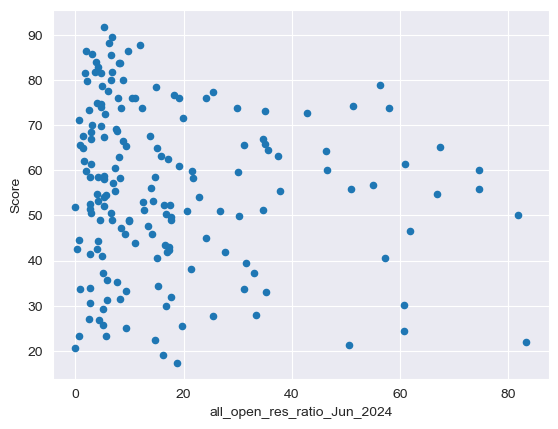

In [10]:
d1.plot.scatter(x='all_open_res_ratio_Jun_2024', y='Score')

In [11]:
d1[['all_open_res_ratio_Jun_2024', 'Score']].corr()

,all_open_res_ratio_Jun_2024,Score
all_open_res_ratio_Jun_2024,1.000000,-0.123106
Score,-0.123106,1.000000


In [12]:
d1[['all_open_res_ratio_Jun_2024', 'Score']].corr(method='spearman')

,all_open_res_ratio_Jun_2024,Score
all_open_res_ratio_Jun_2024,1.000000,-0.121489
Score,-0.121489,1.000000


In [13]:
region_press_corr = (d1
                       .groupby('rv_parent')[['all_open_res_ratio_Jun_2024', 'Score']]
                       .corr()
                       .reset_index()
                       .query("level_1=='Score'")
                       .dropna()
                       .rename(columns={'all_open_res_ratio_Jun_2024': 'Correlation'})
                       .drop(columns=['level_1', 'Score']))
region_press_corr

,rv_parent,Correlation
1,Australia and New Zealand,-1.000000
3,Caribbean,0.354533
5,Central America,0.515588
7,Central Asia,-0.764212
9,Eastern Africa,-0.055109
11,Eastern Asia,0.142985
13,Eastern Europe,-0.220077
15,Melanesia,-1.000000
19,Middle Africa,0.124190
21,Northern Africa,0.254769


/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


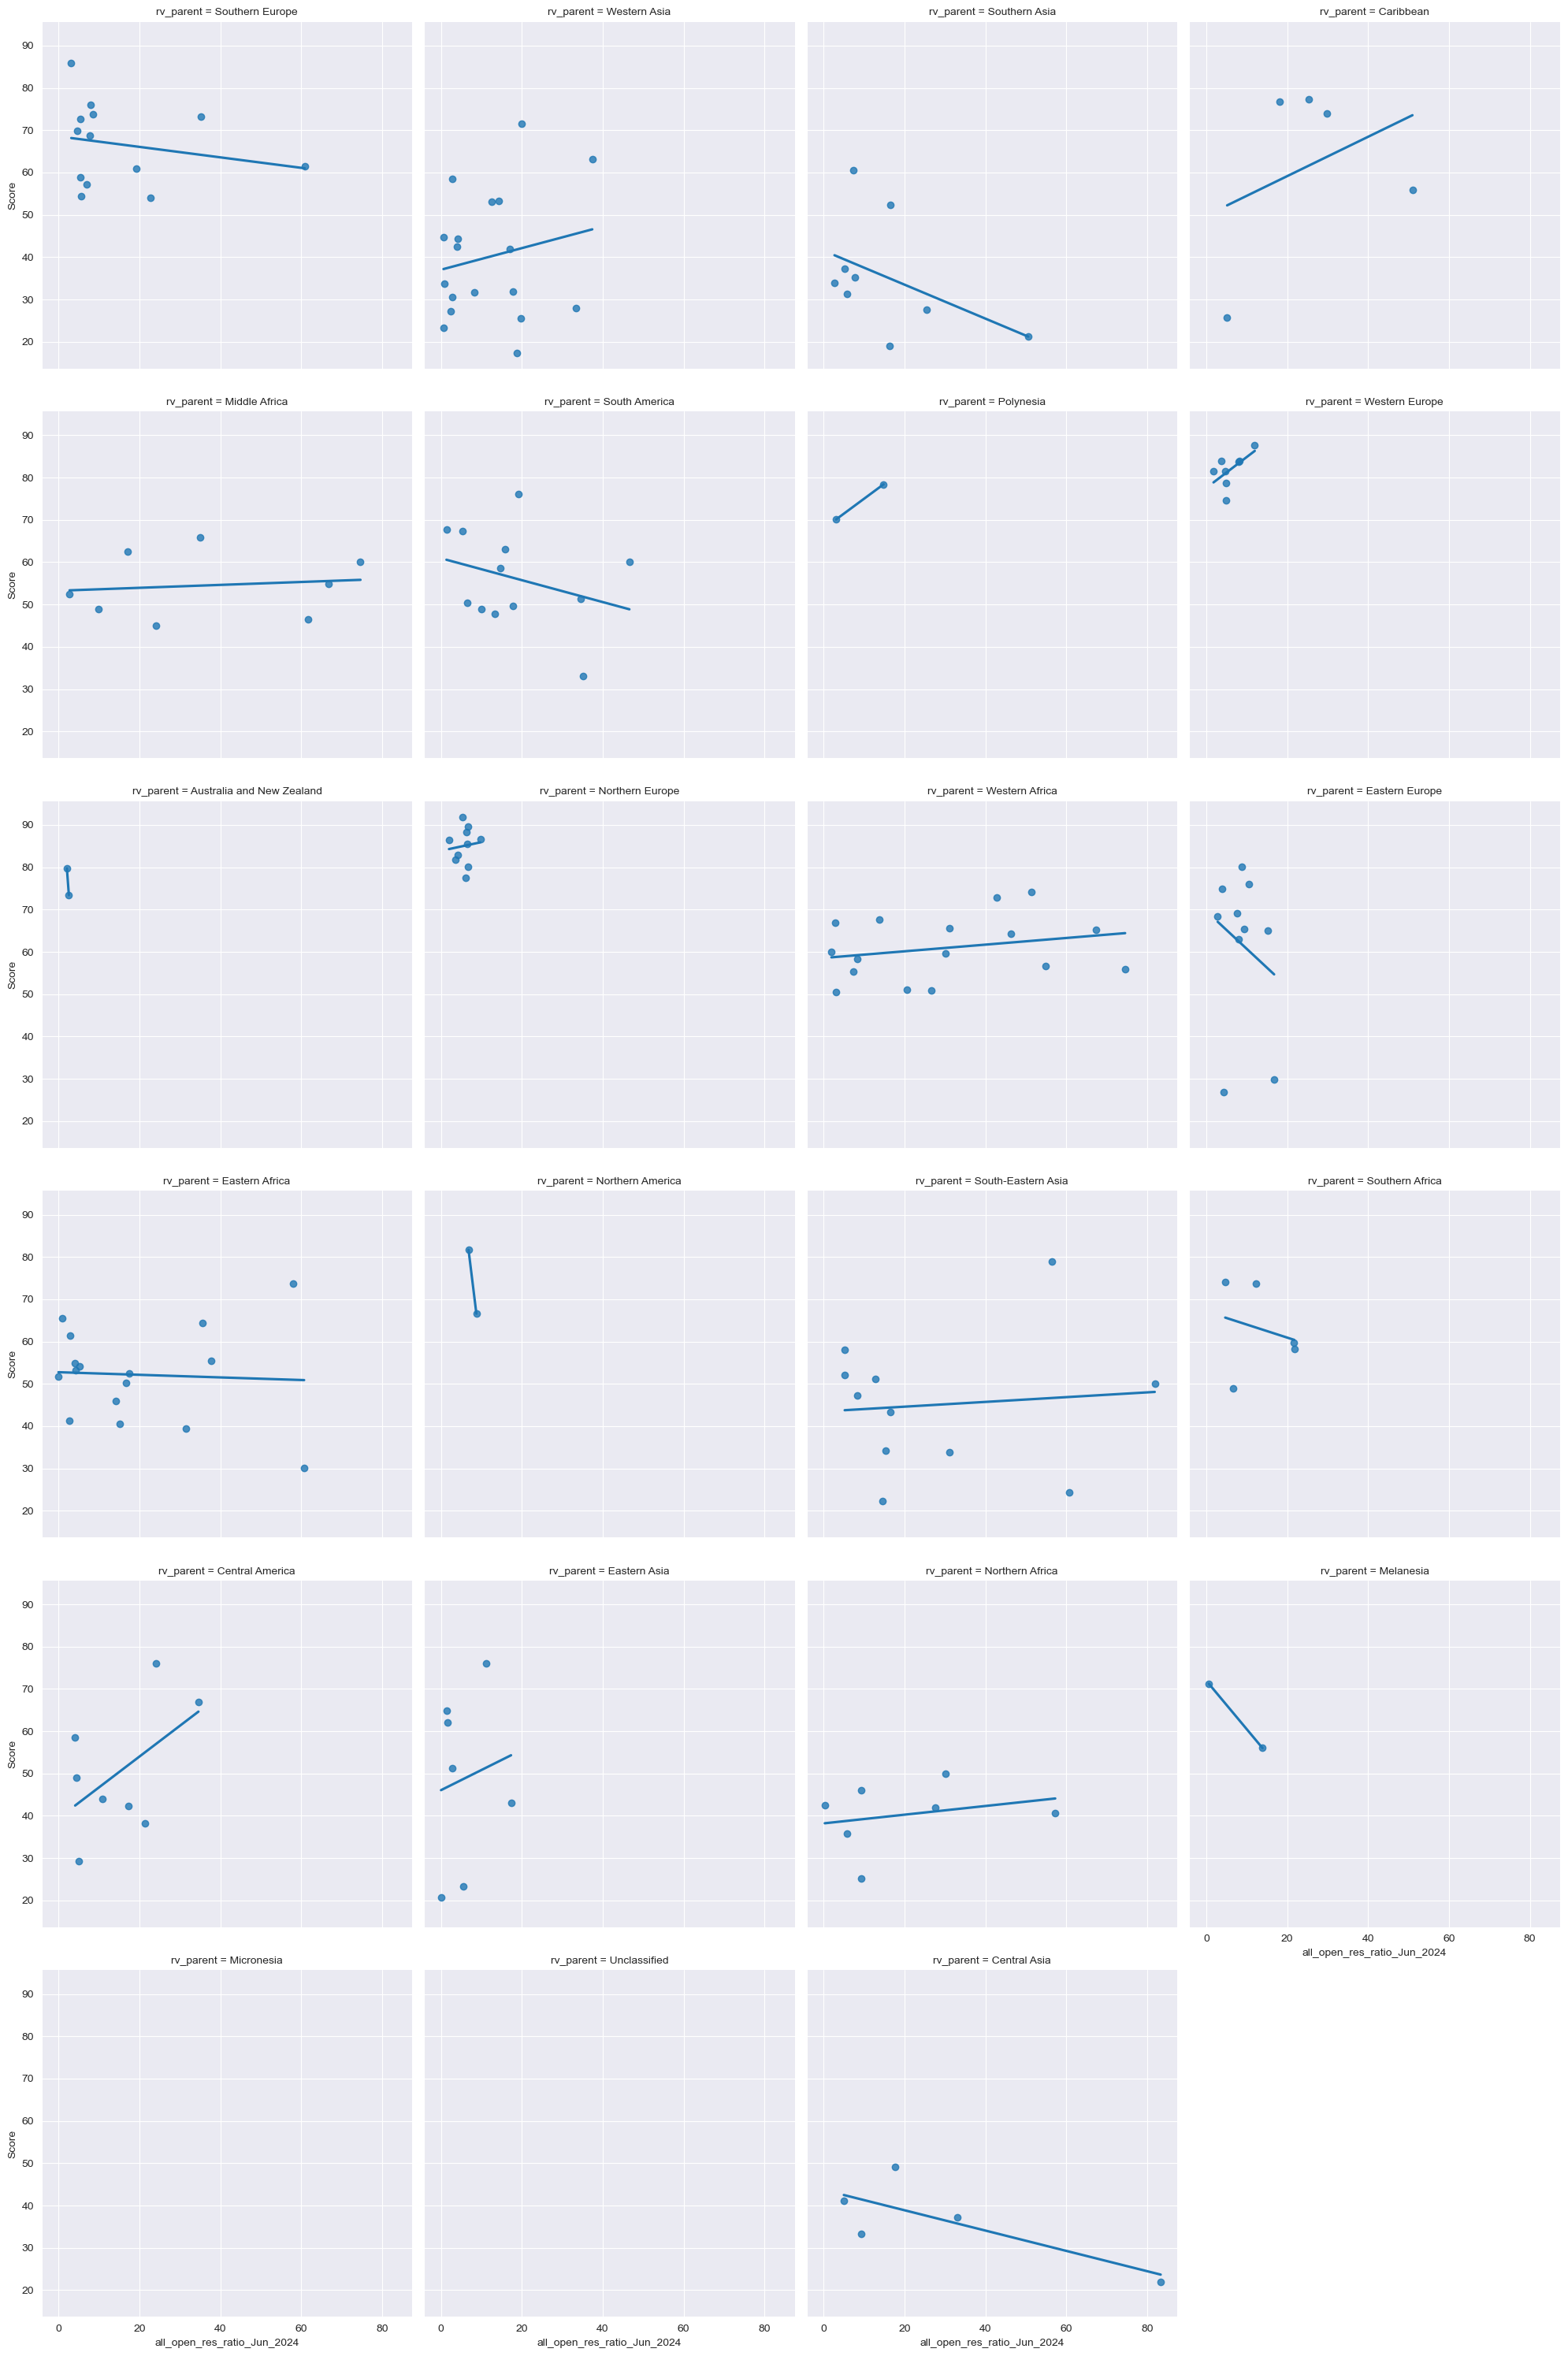

In [14]:
sns.lmplot(data=d1, x='all_open_res_ratio_Jun_2024', y='Score', col='rv_parent', col_wrap=4, ci=None)

In [15]:
d1.head(2)

,rv_cc,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022,rv_parent,iso_alpha3,ISO,Score,Rank,...,Country_EN,Country_ES,Country_PT,Country_AR,Country_FA,Year (N),Rank N-1,Rank evolution,Score N-1,Score evolution
0,AD,67.48,65.45,60.90,-6.58,Southern Europe,AND,AND,61.44,72.0,...,Andorra,Andorra,Andorra,أندورا,آندور,2024.0,37.0,-35.0,75.05,-13.61
1,AE,16.67,14.03,2.74,-13.93,Western Asia,ARE,ARE,30.62,160.0,...,United Arab Emirates,Emiratos Árabes Unidos,Emirados Árabes Unidos,الإمارات العربية المتحدة,امارات متحده عربی,2024.0,145.0,-15.0,42.99,-12.37


/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


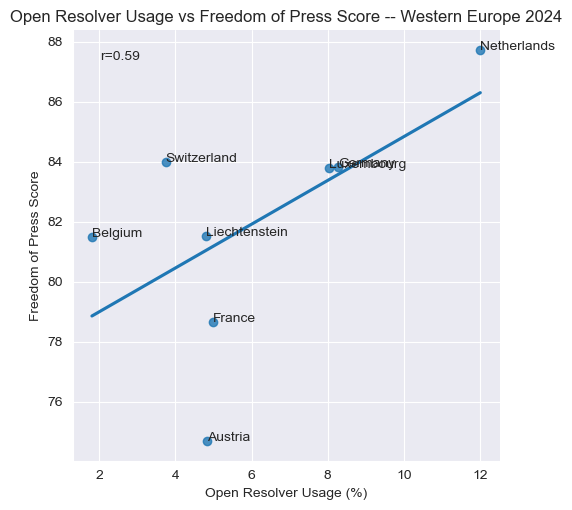

In [59]:
# We want one scatterplot for Western Europe
lm1_df = d1[d1['rv_parent']=='Western Europe'].dropna()
r, p = stats.pearsonr(lm1_df['all_open_res_ratio_Jun_2024'], lm1_df['Score'])
lm1 = sns.lmplot(data=lm1_df, x='all_open_res_ratio_Jun_2024', y='Score', ci=None)
lm1.set(title='Open Resolver Usage vs Freedom of Press Score -- Western Europe 2024', xlabel='Open Resolver Usage (%)', ylabel='Freedom of Press Score')
for idx, row in lm1_df.iterrows():
    lm1.axes[0,0].annotate(row['Country_EN'], xy = (row['all_open_res_ratio_Jun_2024'], row['Score']))

lm1.axes[0,0].annotate(f"r={r:.2f}", xy=(100, 450), xycoords='figure pixels')
lm1.savefig('Western-Europe-2024.Open-Res-Freedom.png')

In [52]:
lm1_df[lm1_df['Score'].isnull()]

,rv_cc,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022,rv_parent,iso_alpha3,ISO,Score,Rank,...,Country_EN,Country_ES,Country_PT,Country_AR,Country_FA,Year (N),Rank N-1,Rank evolution,Score N-1,Score evolution
132,MC,10.98,6.97,8.84,-2.14,Western Europe,MCO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


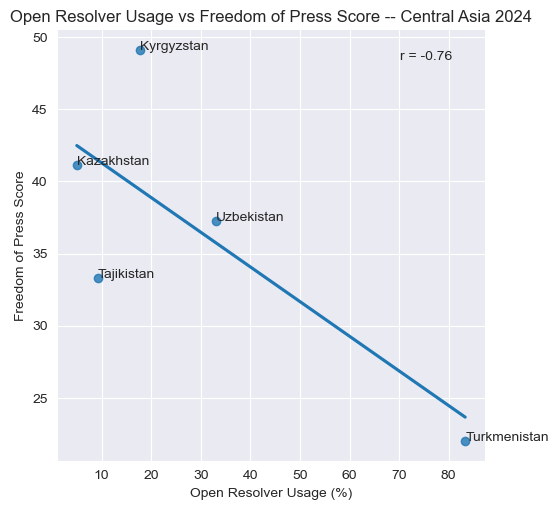

In [63]:
# We want one scatterplot for Western Europe
lm2_df = d1[d1['rv_parent']=='Central Asia'].dropna()
r, p = stats.pearsonr(lm2_df['all_open_res_ratio_Jun_2024'], lm2_df['Score'])
lm2 = sns.lmplot(data=lm2_df, x='all_open_res_ratio_Jun_2024', y='Score', ci=None)
lm2.set(title='Open Resolver Usage vs Freedom of Press Score -- Central Asia 2024', xlabel='Open Resolver Usage (%)', ylabel='Freedom of Press Score')
for idx, row in lm2_df.iterrows():
    lm2.axes[0,0].annotate(row['Country_EN'], xy = (row['all_open_res_ratio_Jun_2024'], row['Score']))

lm2.axes[0,0].annotate(f"r = {r:.2f}", xy=(400, 450), xycoords='figure pixels')
lm2.savefig('Central Asia-2024.Open-Res-Freedom.png')

/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


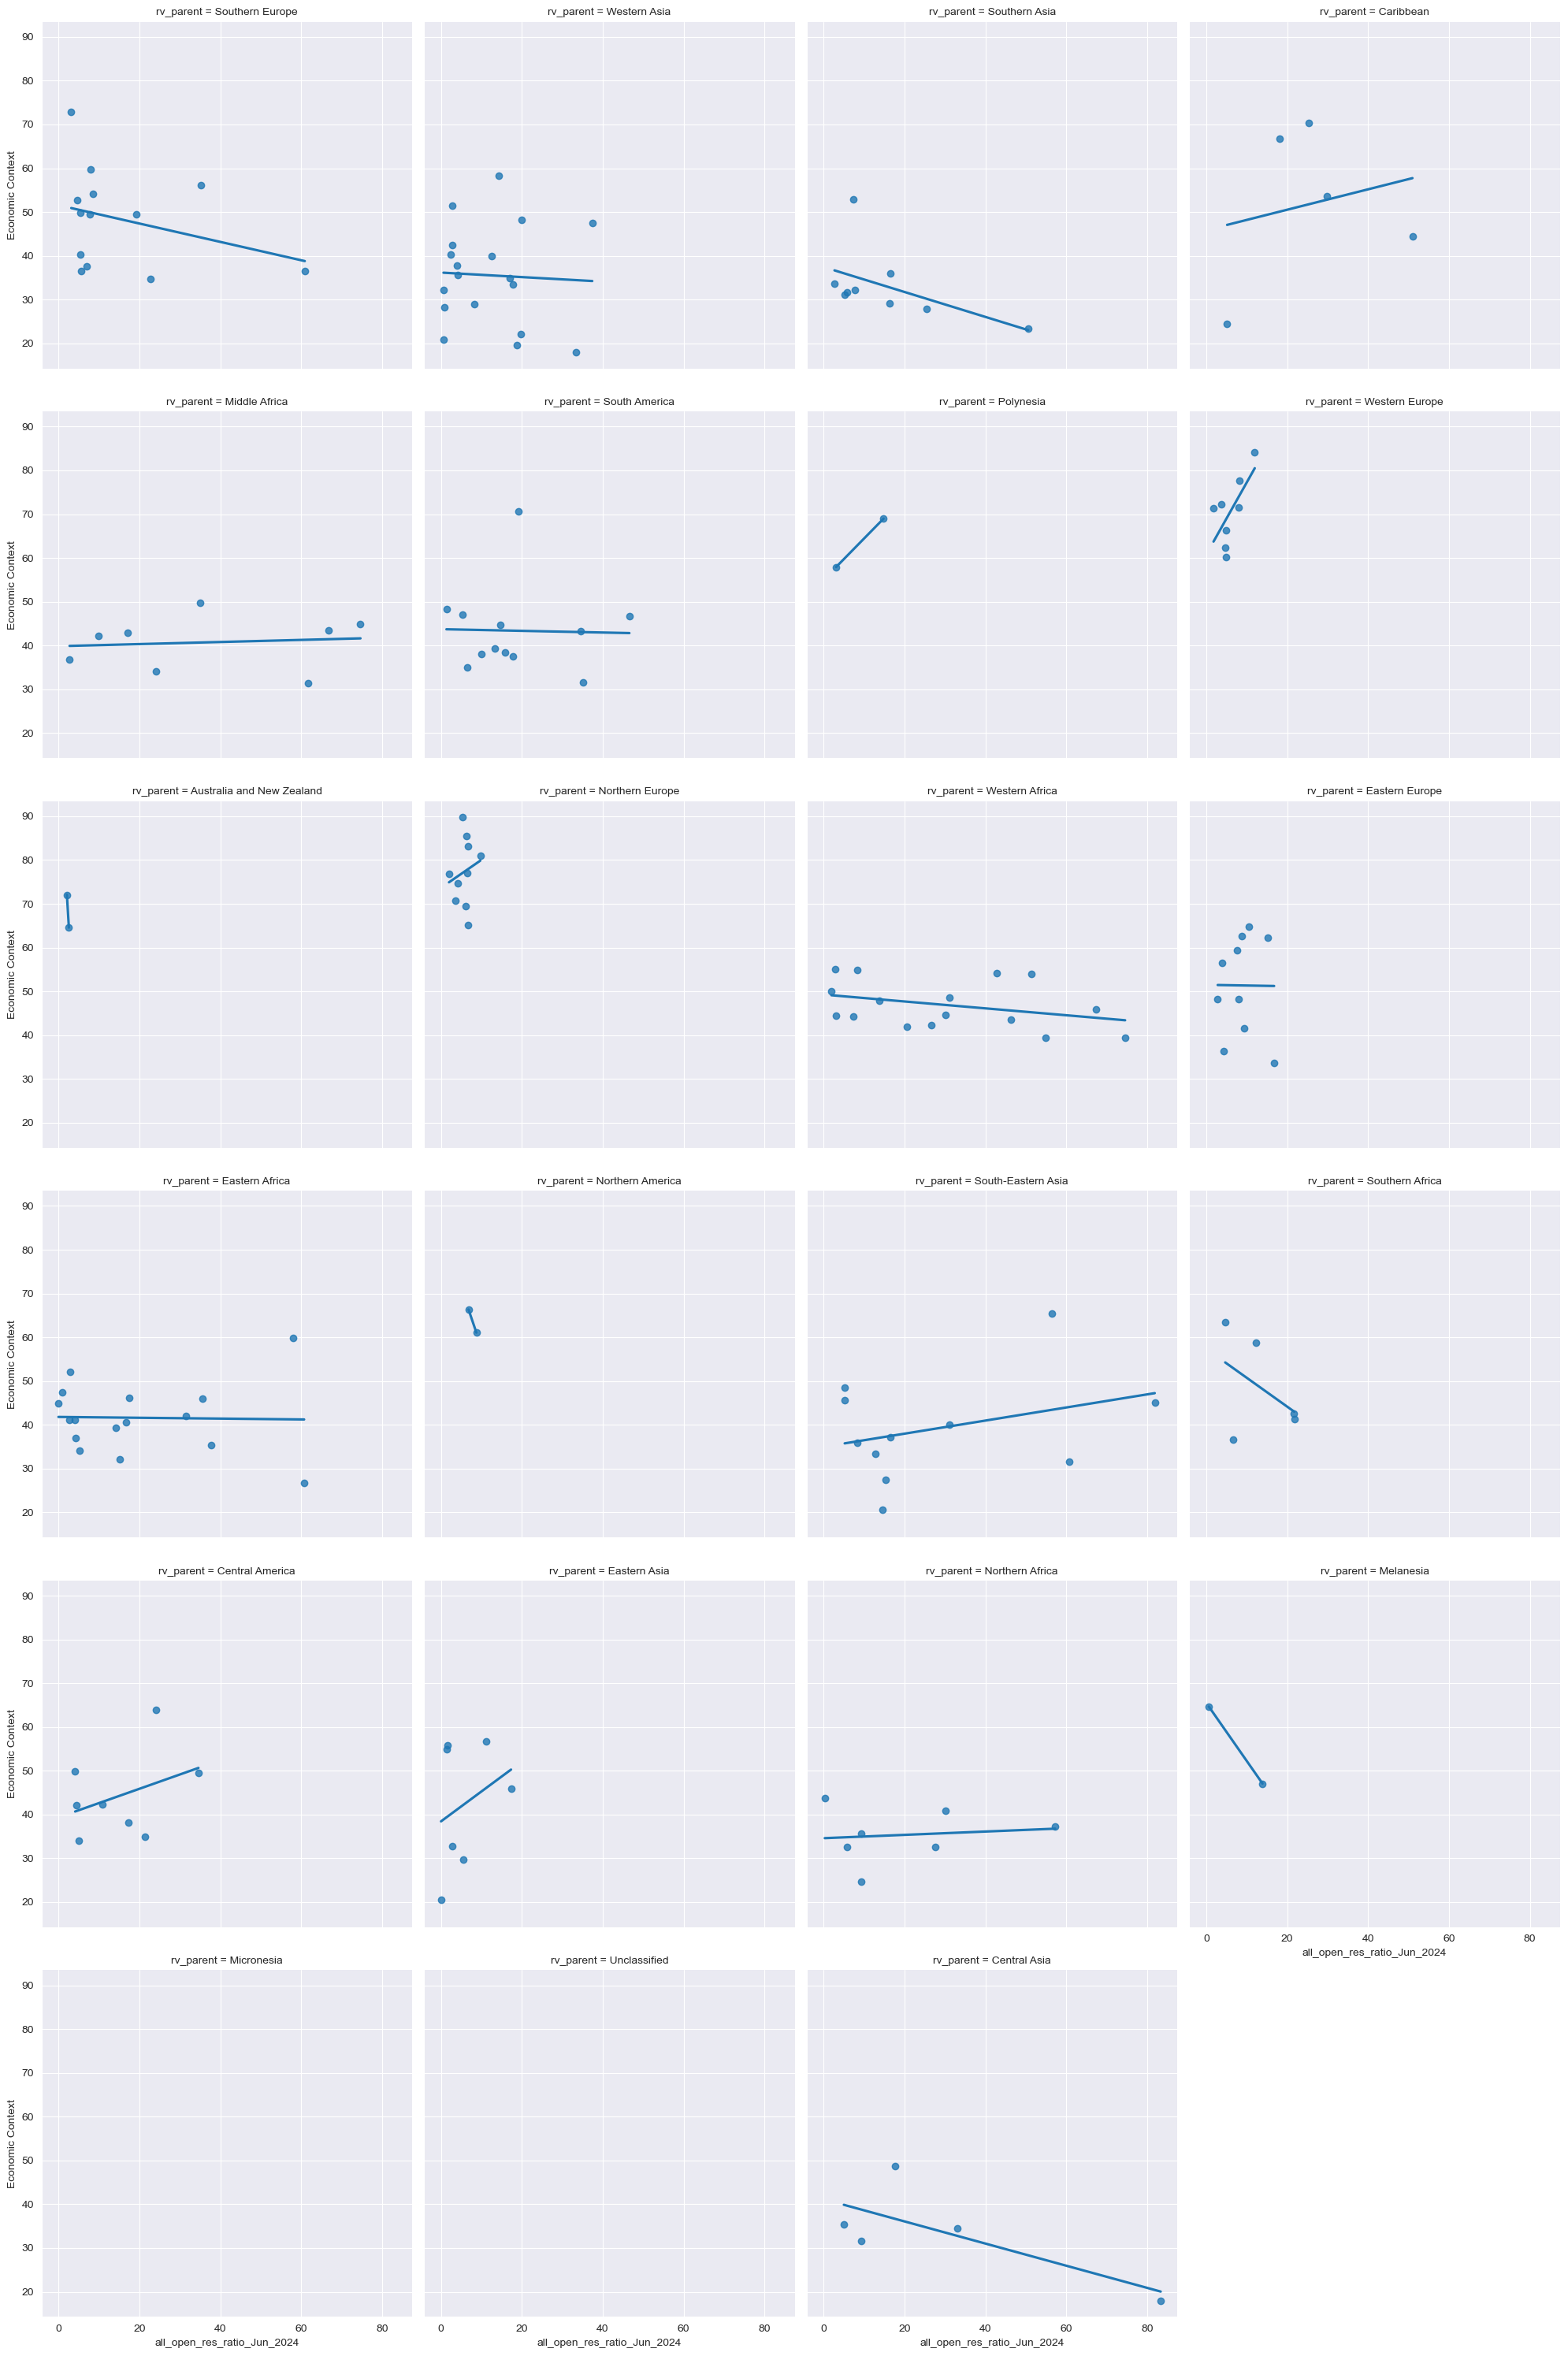

In [19]:
sns.lmplot(data=d1, x='all_open_res_ratio_Jun_2024', y='Economic Context', col='rv_parent', col_wrap=4, ci=None)
# sns.regplot(data=d1, x='all_open_res_ratio_Jun_2024', y='Economic Context')

<Axes: xlabel='all_open_res_ratio_Jun_2024', ylabel='Political Context'>

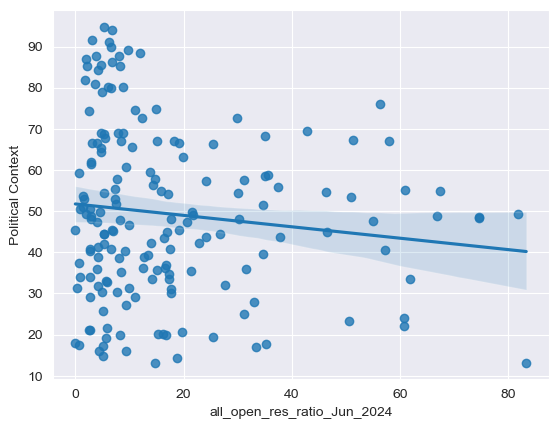

In [20]:
sns.regplot(data=d1, x='all_open_res_ratio_Jun_2024', y='Political Context')

<Axes: xlabel='all_open_res_ratio_Jun_2024', ylabel='Social Context'>

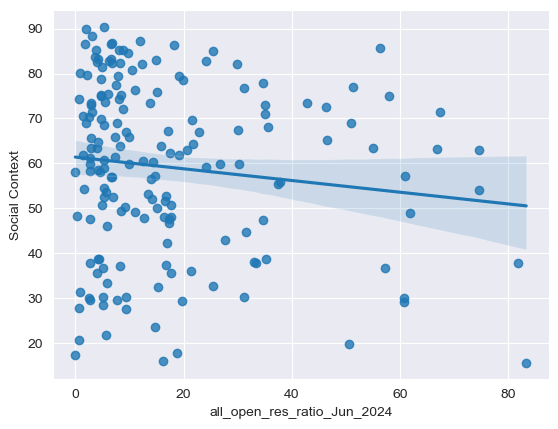

In [21]:
sns.regplot(data=d1, x='all_open_res_ratio_Jun_2024', y='Social Context')

In [22]:
d1[['all_open_res_ratio_Jun_2024', 'Score', 'Safety', 'Political Context', 'Social Context']].corr()

,all_open_res_ratio_Jun_2024,Score,Safety,Political Context,Social Context
all_open_res_ratio_Jun_2024,1.000000,-0.123106,-0.052015,-0.124169,-0.125911
Score,-0.123106,1.000000,0.887411,0.961412,0.960413
Safety,-0.052015,0.887411,1.000000,0.782787,0.798282
Political Context,-0.124169,0.961412,0.782787,1.000000,0.908166
Social Context,-0.125911,0.960413,0.798282,0.908166,1.000000


In [23]:
f0 = pd.read_csv('freedom-net-scores.txt', sep="\t")

In [24]:
f0['iso_alpha3'] = f0['Country'].apply(lambda x: countries[x].alpha3)
f0['iso_alpha2'] = f0['Country'].apply(lambda x: countries[x].alpha2)
f0['score'] = f0['Total Score'].apply(lambda x: x.split(' ')[0]).astype(int)

In [25]:
f0.head(5)

,Country,Total Score,Obstacles,Limits,Violations,iso_alpha3,iso_alpha2,score
0,Angola,59 Partly Free,12,28,19,AGO,AO,59
1,Argentina,73 Free,19,28,26,ARG,AR,73
2,Armenia,72 Free,19,28,25,ARM,AM,72
3,Australia,76 Free,23,28,25,AUS,AU,76
4,Azerbaijan,37 Not Free,11,15,11,AZE,AZ,37


In [26]:
d2 = f0.merge(cc, left_on='iso_alpha2', right_on='rv_cc', how='left').drop(columns=['iso_alpha3_y'])

In [27]:
d2.head(5)

,Country,Total Score,Obstacles,Limits,Violations,iso_alpha3_x,iso_alpha2,score,rv_cc,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022,rv_parent
0,Angola,59 Partly Free,12,28,19,AGO,AO,59,AO,15.24,25.32,2.75,-12.49,Middle Africa
1,Argentina,73 Free,19,28,26,ARG,AR,73,AR,20.62,19.71,15.85,-4.77,South America
2,Armenia,72 Free,19,28,25,ARM,AM,72,AM,24.86,26.63,19.88,-4.98,Western Asia
3,Australia,76 Free,23,28,25,AUS,AU,76,AU,8.19,4.81,2.58,-5.61,Australia and New Zealand
4,Azerbaijan,37 Not Free,11,15,11,AZE,AZ,37,AZ,39.22,33.78,33.39,-5.83,Western Asia


In [28]:
region_freedom_corr = (d2
                       .groupby('rv_parent')[['all_open_res_ratio_Jun_2024', 'score']]
                       .corr()
                       .reset_index()
                       .query("level_1=='score'")
                       .dropna()
                       .rename(columns={'all_open_res_ratio_Jun_2024': 'Correlation'})
                       .drop(columns=['level_1', 'score']))
region_freedom_corr

,rv_parent,Correlation
5,Central America,0.873494
7,Central Asia,-0.379958
9,Eastern Africa,0.456343
11,Eastern Asia,-0.006547
13,Eastern Europe,-0.047348
17,Northern Africa,0.310127
19,Northern America,-1.000000
21,Northern Europe,-0.346341
23,South America,-0.673931
25,South-Eastern Asia,-0.726765


/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


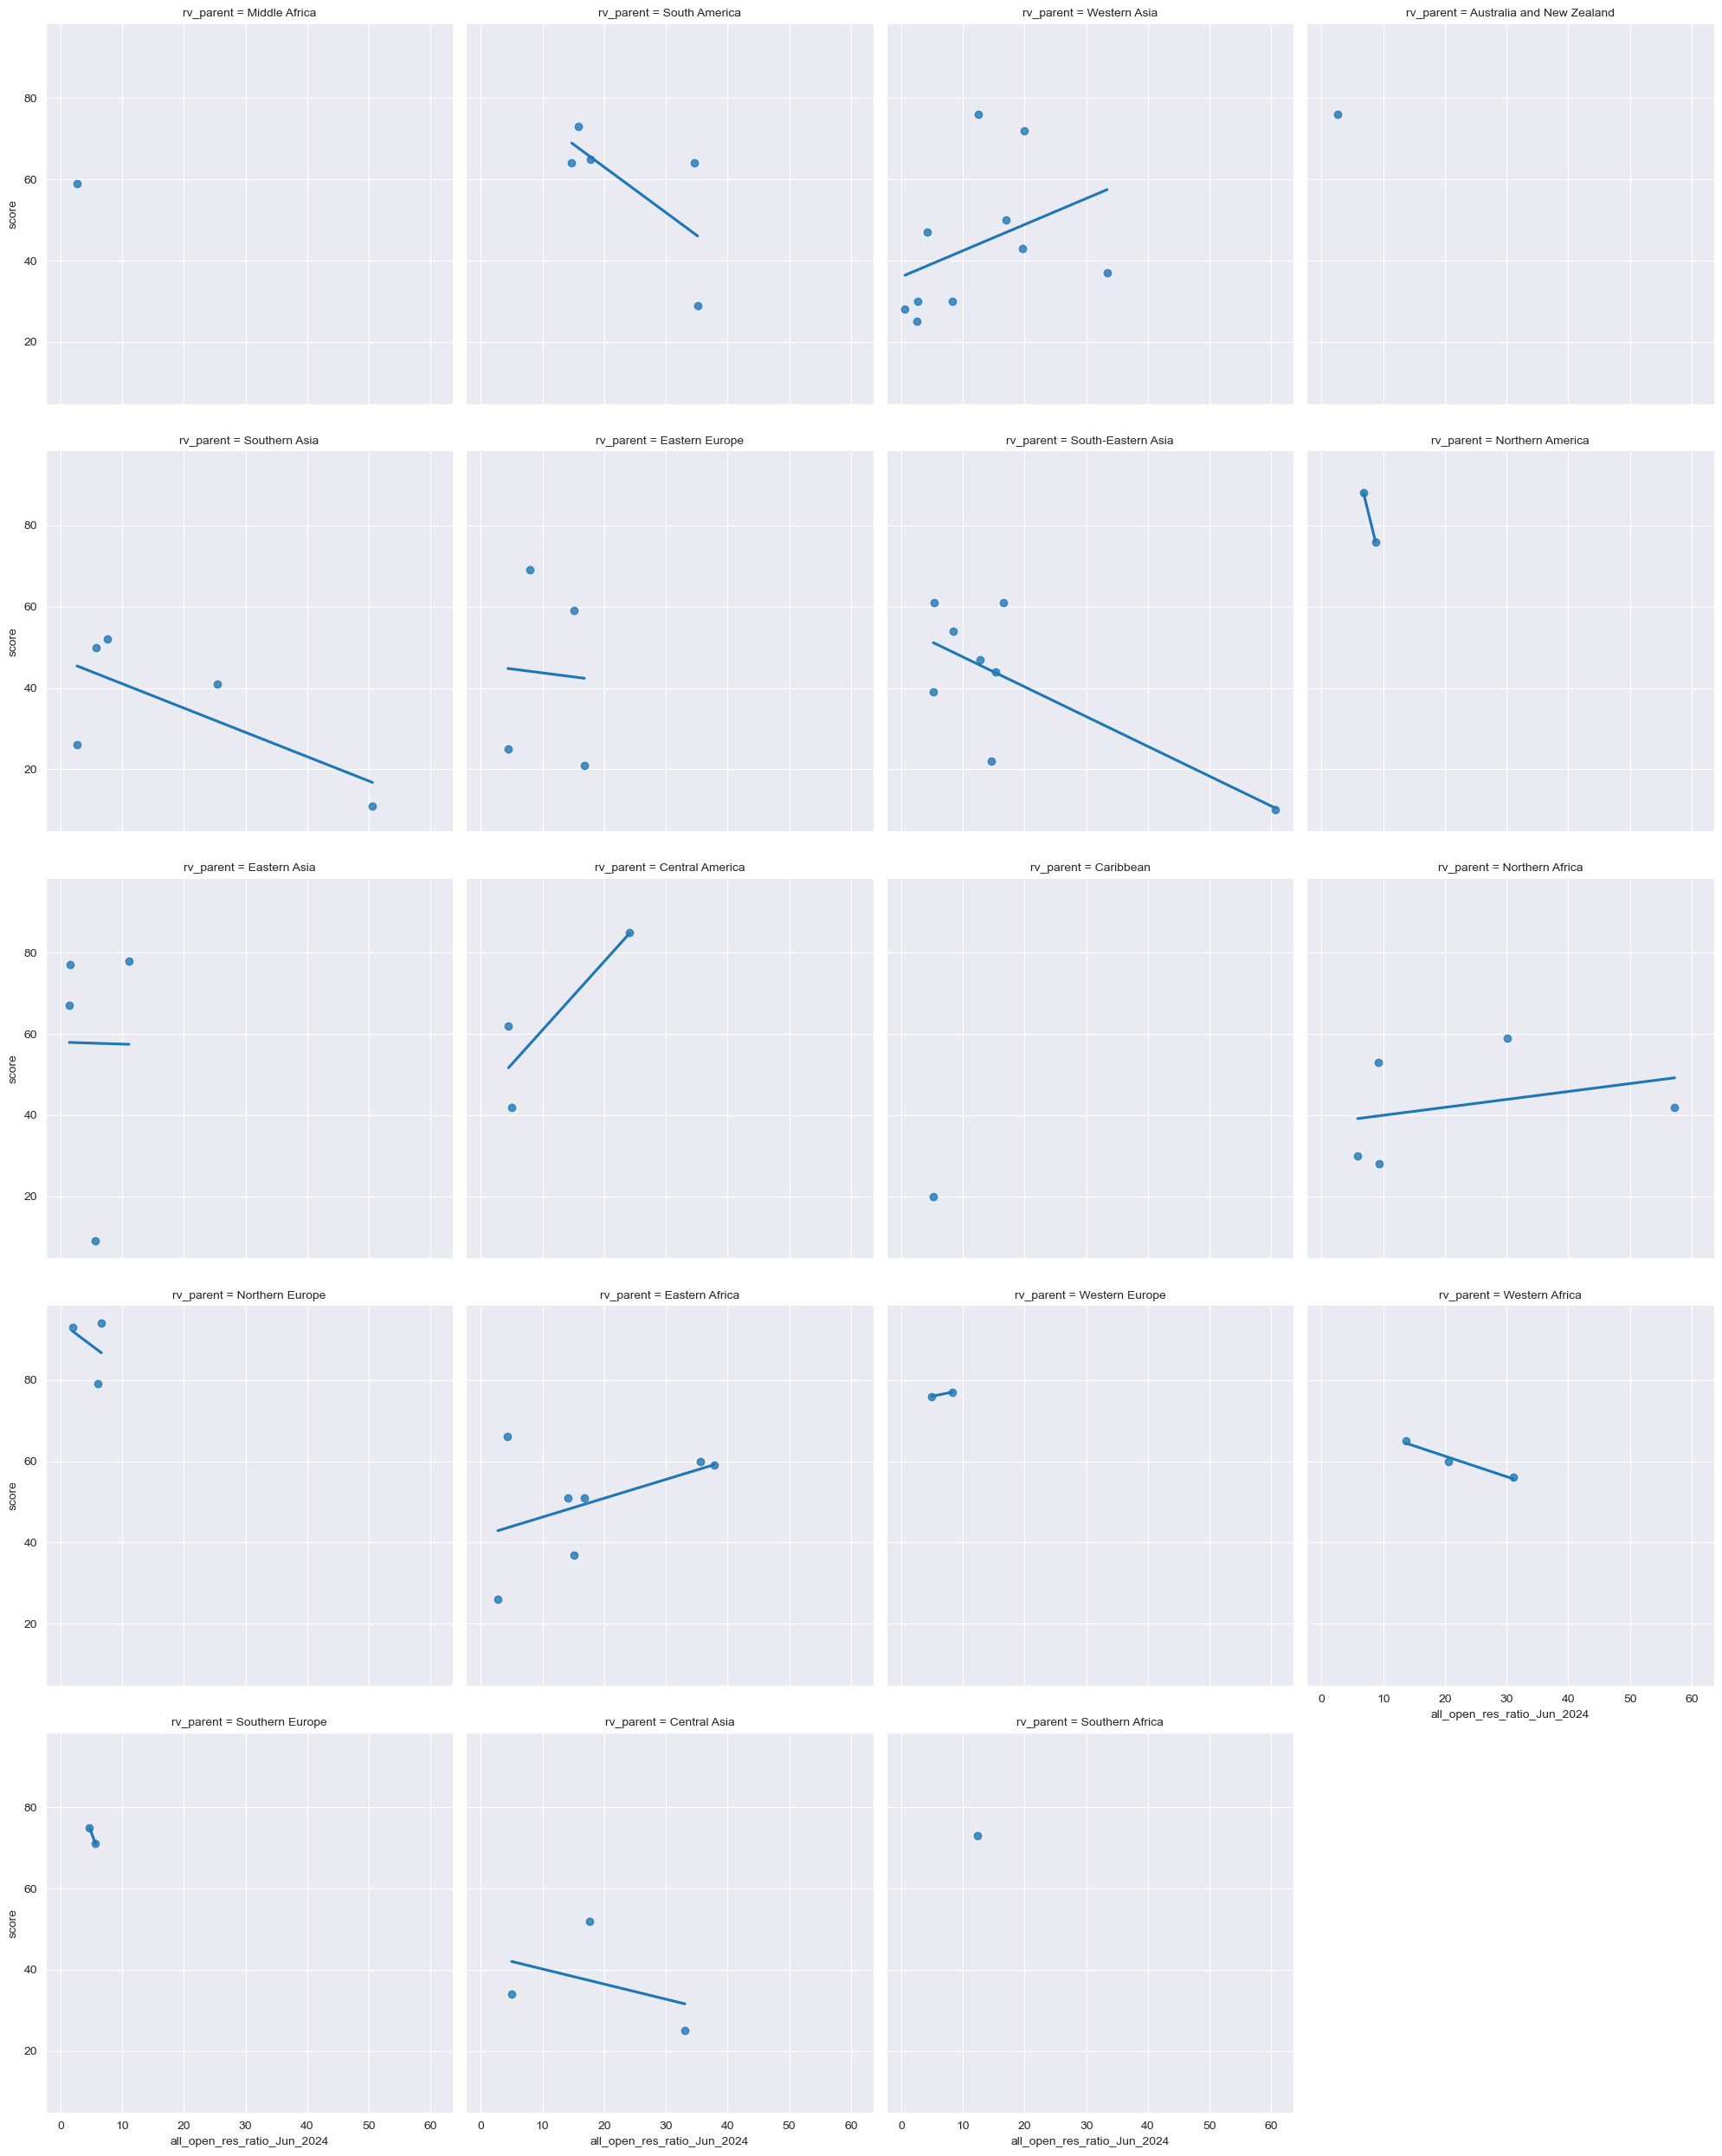

In [29]:
sns.lmplot(data=d2, x='all_open_res_ratio_Jun_2024', y='score', col='rv_parent', col_wrap=4, ci=None)
# sns.regplot(data=d2, x='all_open_res_ratio_Jun_2024', y='score')

/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


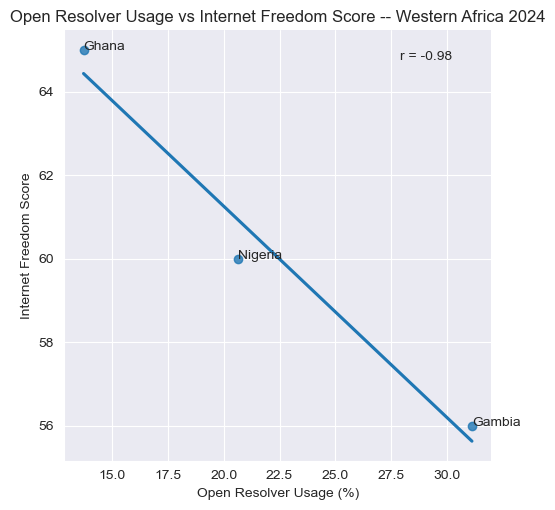

In [66]:
lm3_df = d2[d2['rv_parent']=='Western Africa']
lm3 = sns.lmplot(data=lm3_df, x='all_open_res_ratio_Jun_2024', y='score', ci=None)

r, p = stats.pearsonr(lm3_df['all_open_res_ratio_Jun_2024'], lm3_df['score'])

lm3.set(title='Open Resolver Usage vs Internet Freedom Score -- Western Africa 2024', xlabel='Open Resolver Usage (%)', ylabel='Internet Freedom Score')
for idx, row in lm3_df.iterrows():
    lm3.axes[0,0].annotate(row['Country'], xy = (row['all_open_res_ratio_Jun_2024'], row['score']))

lm3.axes[0,0].annotate(f"r = {r:.2f}", xy=(400, 450), xycoords='figure pixels')
lm3.savefig('Western Africa-2024.Open-Res-Internet-Freedom.png')

/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


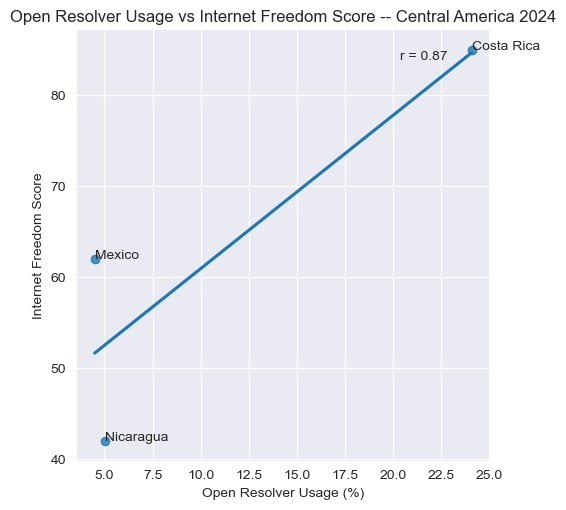

In [67]:
lm4_df = d2[d2['rv_parent']=='Central America']
lm4 = sns.lmplot(data=lm4_df, x='all_open_res_ratio_Jun_2024', y='score', ci=None)

r, p = stats.pearsonr(lm4_df['all_open_res_ratio_Jun_2024'], lm4_df['score'])

lm4.set(title='Open Resolver Usage vs Internet Freedom Score -- Central America 2024', xlabel='Open Resolver Usage (%)', ylabel='Internet Freedom Score')
for idx, row in lm4_df.iterrows():
    lm4.axes[0,0].annotate(row['Country'], xy = (row['all_open_res_ratio_Jun_2024'], row['score']))

lm4.axes[0,0].annotate(f"r = {r:.2f}", xy=(400, 450), xycoords='figure pixels')
lm4.savefig('Central-America-2024.Open-Res-Internet-Freedom.png')

In [30]:
gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_710171.csv', skiprows=4)

In [31]:
def country_code2alpha2(cc:str) -> str:
    try:
        iso_info = countries[cc]
        return iso_info.alpha2
    except KeyError as e:
        return ''

In [32]:
gdp['iso_alpha2'] = gdp['Country Code'].map(country_code2alpha2)

In [33]:
gdp.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68,iso_alpha2
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN,AW
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12,NaN,
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN,AF
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11,NaN,
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10,NaN,AO


In [34]:
d3 = cc.merge(gdp[~gdp['iso_alpha2'].isnull()], left_on='rv_cc', right_on='iso_alpha2', how='left')

In [35]:
d3.head(5)

,rv_cc,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022,rv_parent,iso_alpha3,Country Name,Country Code,Indicator Name,...,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68,iso_alpha2
0,AD,67.48,65.45,60.90,-6.58,Southern Europe,AND,Andorra,AND,GDP (current US$),...,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.324683e+09,3.380602e+09,3.727674e+09,NaN,AD
1,AE,16.67,14.03,2.74,-13.93,Western Asia,ARE,United Arab Emirates,ARE,GDP (current US$),...,3.692553e+11,3.905168e+11,4.270494e+11,4.179897e+11,3.494730e+11,4.151788e+11,5.070640e+11,5.041735e+11,NaN,AE
2,AF,72.50,22.01,16.23,-56.27,Southern Asia,AFG,Afghanistan,AFG,GDP (current US$),...,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN,AF
3,AG,10.97,27.54,15.53,4.56,Caribbean,ATG,Antigua and Barbuda,ATG,GDP (current US$),...,1.489693e+09,1.531152e+09,1.661530e+09,1.725352e+09,1.410796e+09,1.601367e+09,1.867733e+09,2.033085e+09,NaN,AG
4,AI,60.42,9.73,34.62,-25.80,Caribbean,AIA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


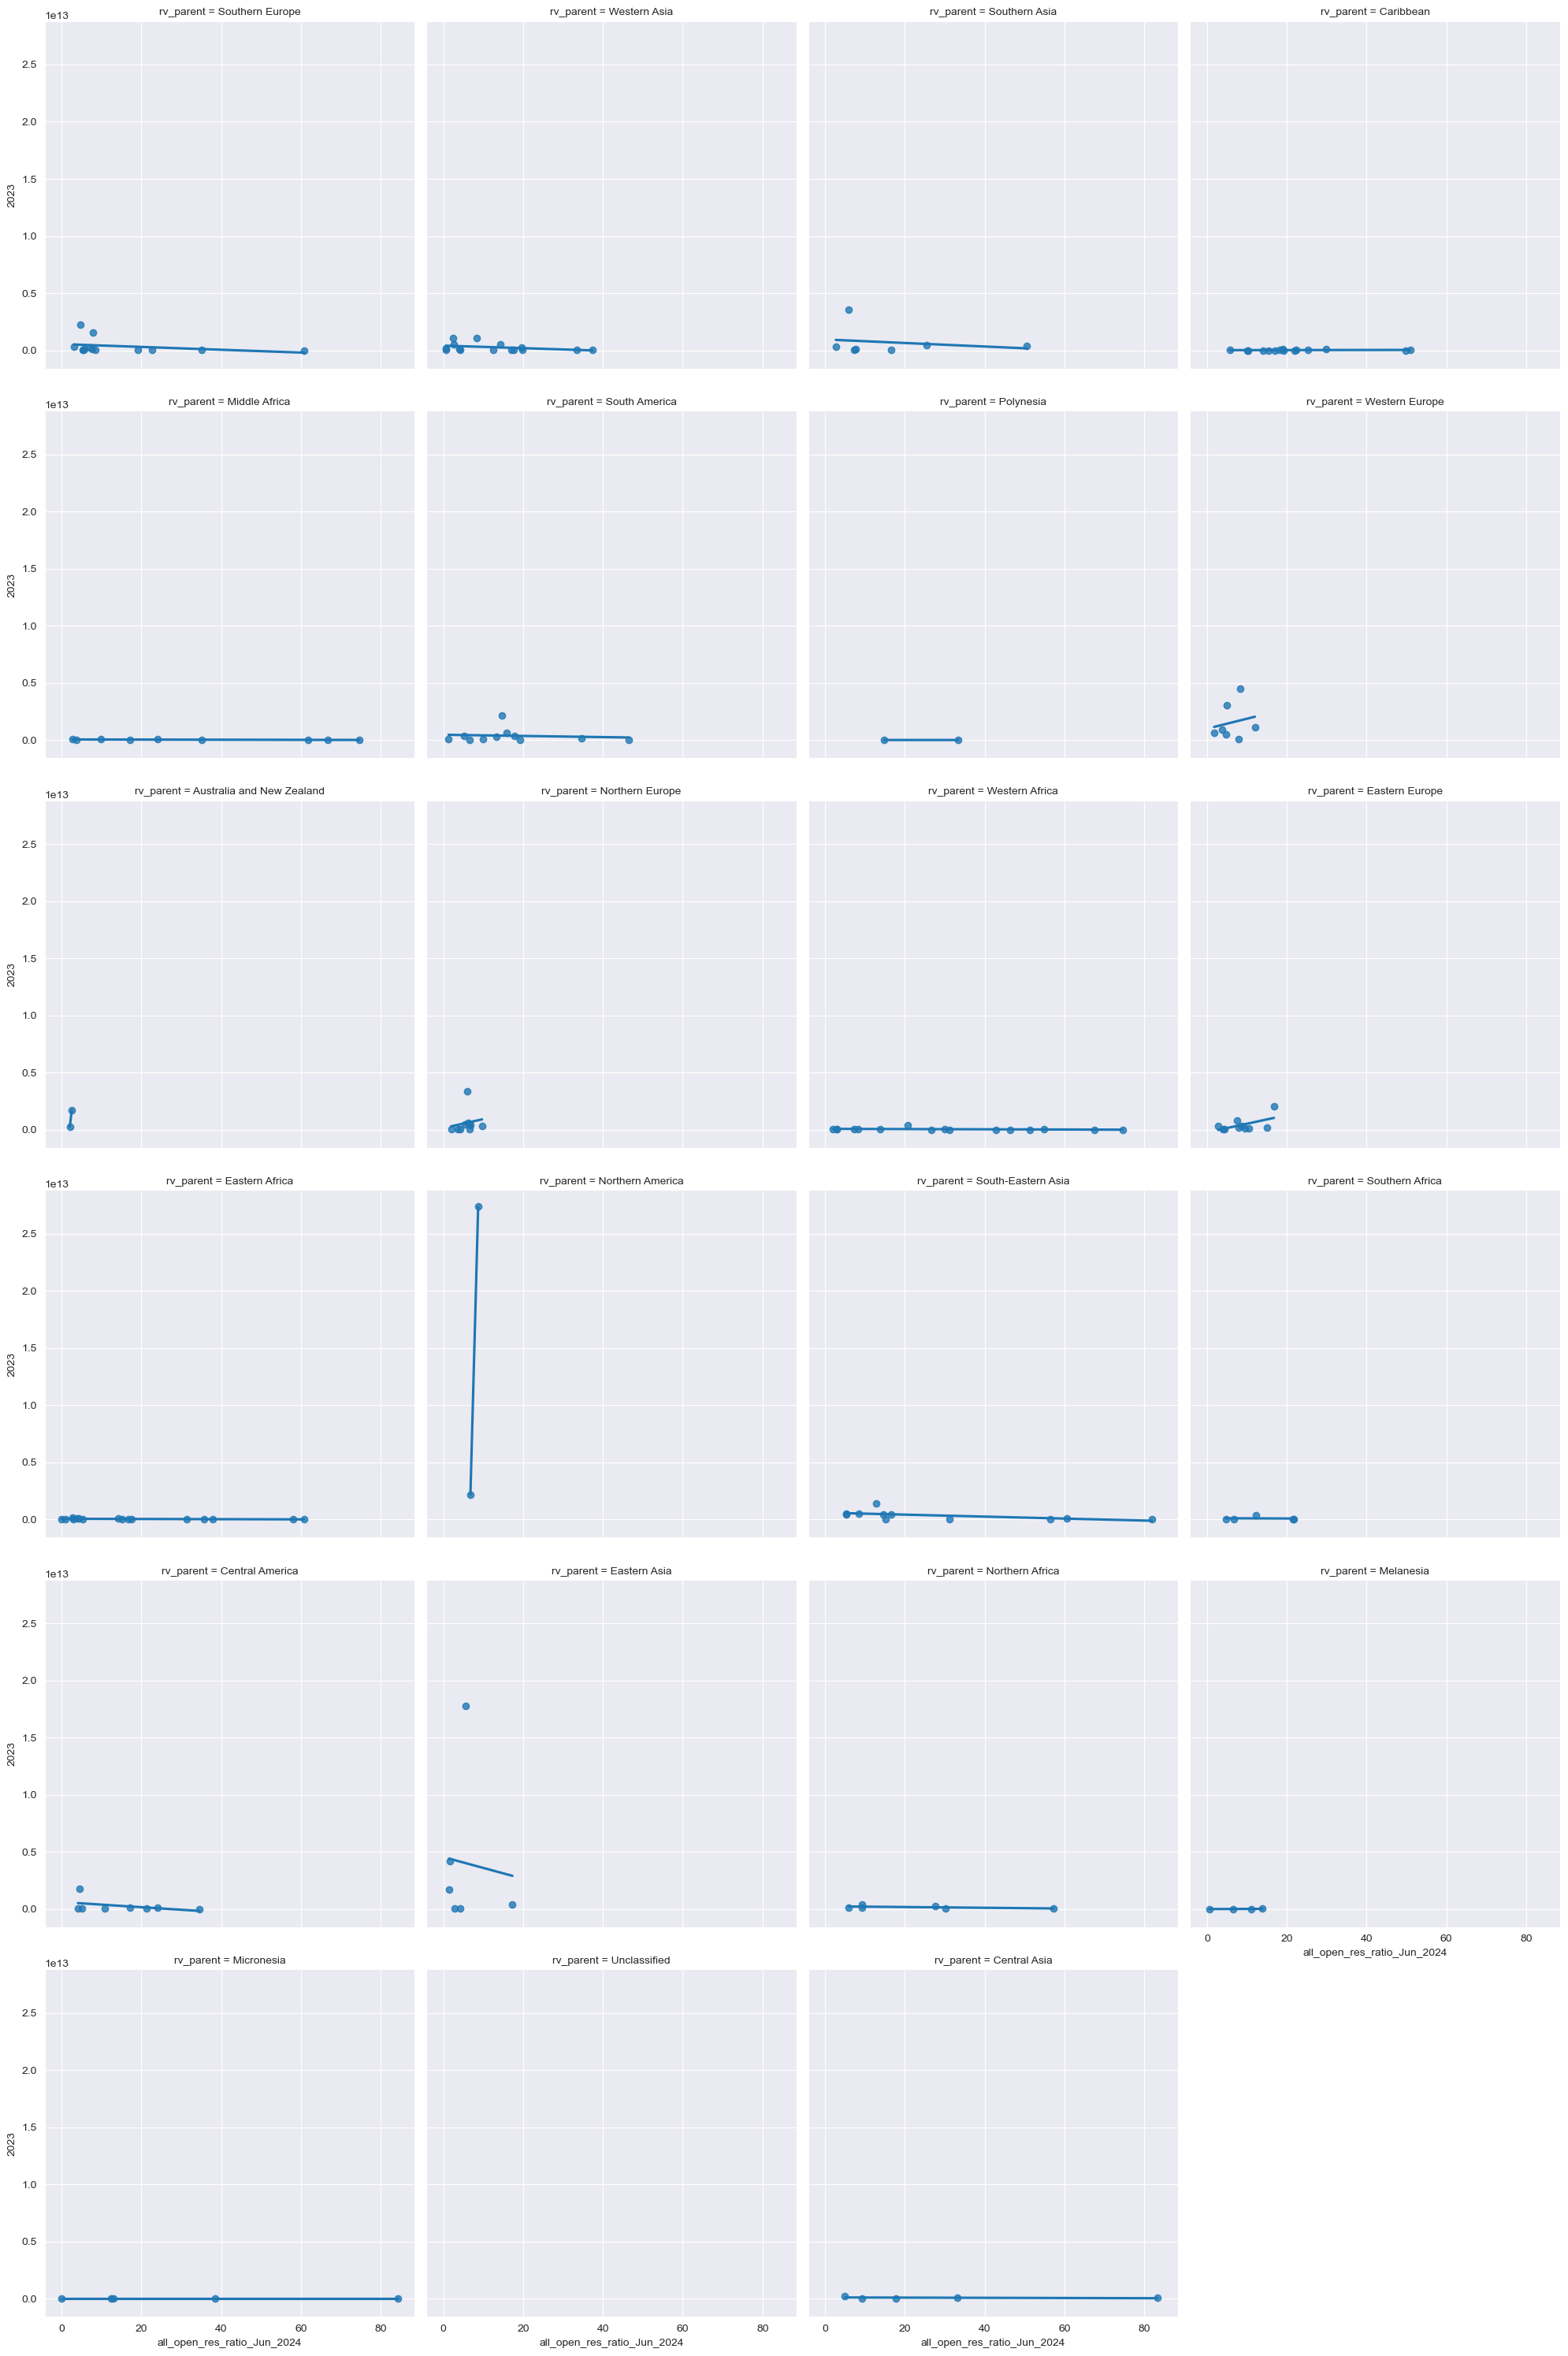

In [36]:
# sns.regplot(data=d3, x='all_open_res_ratio_Jun_2024', y='2023')
sns.lmplot(data=d3, x='all_open_res_ratio_Jun_2024', y='2023', col='rv_parent', col_wrap=4, ci=None)

In [37]:
region_gdp_corr = (d3
                       .groupby('rv_parent')[['all_open_res_ratio_Jun_2024', '2023']]
                       .corr()
                       .reset_index()
                       .query("level_1=='2023'")
                       .dropna()
                       .rename(columns={'all_open_res_ratio_Jun_2024': 'Correlation'})
                       .drop(columns=['level_1', '2023']))
region_gdp_corr

,rv_parent,Correlation
1,Australia and New Zealand,1.000000
3,Caribbean,0.120815
5,Central America,-0.403903
7,Central Asia,-0.255540
9,Eastern Africa,-0.394182
11,Eastern Asia,-0.082126
13,Eastern Europe,0.568570
15,Melanesia,0.573617
17,Micronesia,0.370684
19,Middle Africa,-0.565607


# Population Correlation

In [38]:
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1114030.csv', skiprows=4)
pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,990150.0,1014211.0,1038618.0,1063175.0,1087700.0,1111812.0,...,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20569737.0,NaN


In [39]:
pop['iso_alpha2'] = pop['Country Code'].map(country_code2alpha2)

In [40]:
d4 = cc.merge(pop[~pop['iso_alpha2'].isnull()], left_on='rv_cc', right_on='iso_alpha2', how='left')

In [41]:
d4.head(2)

,rv_cc,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022,rv_parent,iso_alpha3,Country Name,Country Code,Indicator Name,...,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68,iso_alpha2
0,AD,67.48,65.45,60.90,-6.58,Southern Europe,AND,Andorra,AND,"Population, total",...,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0,79824.0,80088.0,NaN,AD
1,AE,16.67,14.03,2.74,-13.93,Western Asia,ARE,United Arab Emirates,ARE,"Population, total",...,8994263.0,9068296.0,9140169.0,9211657.0,9287289.0,9365145.0,9441129.0,9516871.0,NaN,AE


/Users/sebastian/opt/anaconda3_2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


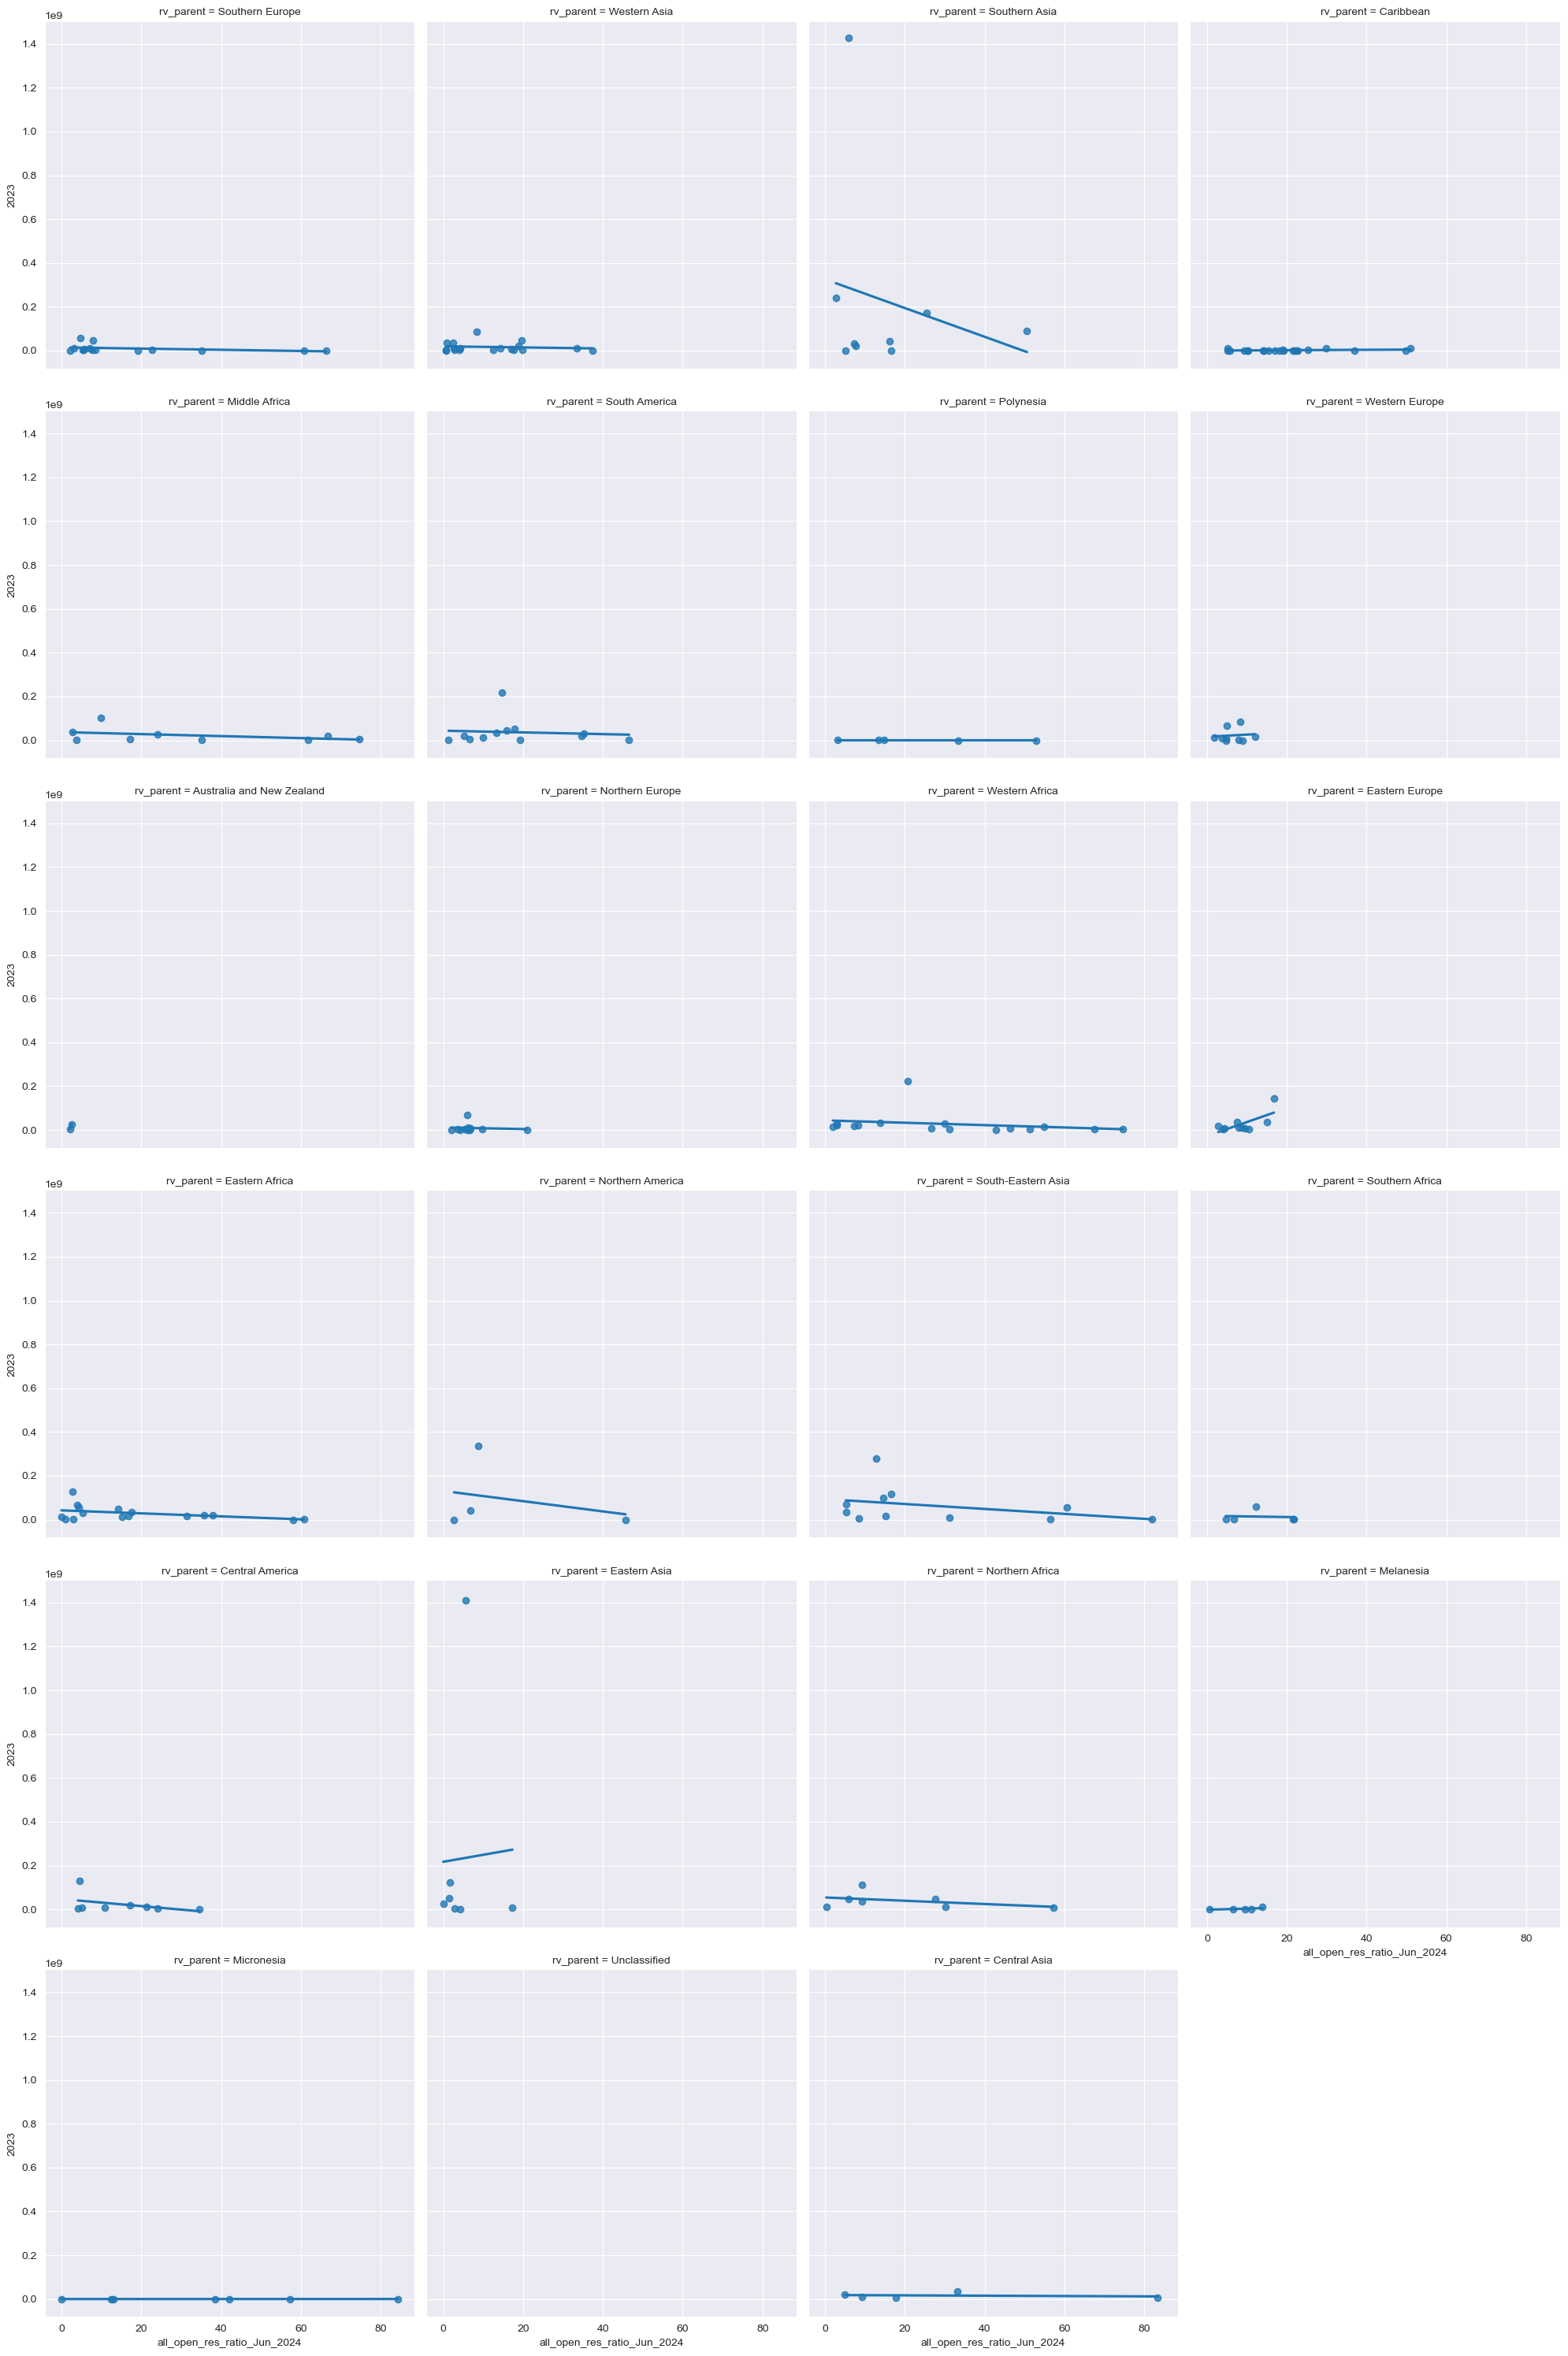

In [42]:
# sns.regplot(data=d3, x='all_open_res_ratio_Jun_2024', y='2023')
sns.lmplot(data=d4, x='all_open_res_ratio_Jun_2024', y='2023', col='rv_parent', col_wrap=4, ci=None)

In [43]:
region_pop_corr = (d4
                   .groupby('rv_parent')[['all_open_res_ratio_Jun_2023', '2023']]
                   .corr()
                   .reset_index()
                   .query("level_1=='2023'")
                   .dropna()
                   .rename(columns={'all_open_res_ratio_Jun_2023': 'Correlation'})
                   .drop(columns=['level_1', '2023']))
region_pop_corr

,rv_parent,Correlation
1,Australia and New Zealand,-1.000000
3,Caribbean,0.246901
5,Central America,-0.280961
7,Central Asia,-0.140808
9,Eastern Africa,-0.098913
11,Eastern Asia,-0.114559
13,Eastern Europe,0.656114
15,Melanesia,0.906362
17,Micronesia,-0.017813
19,Middle Africa,-0.198011


# Save all the data in a spreadsheet

In [44]:
with pd.ExcelWriter('open-resolvers-correlations.xlsx') as writer:
    d1.to_excel(writer, index=False, sheet_name='Freedom of Press')
    region_press_corr.to_excel(writer, index=False, sheet_name='Press-OpenRes correlation')
    d2.to_excel(writer, index=False, sheet_name='Internet Freedom')
    region_freedom_corr.to_excel(writer, index=False, sheet_name='Internet-OpenRes correlation')
    d3.to_excel(writer, index=False, sheet_name='GDP')
    region_gdp_corr.to_excel(writer, index=False, sheet_name='GDP-OpenRes correlation')
    d4.to_excel(writer, index=False, sheet_name='Population')
    region_pop_corr.to_excel(writer, index=False, sheet_name='Population-OpenRes correlation')